In [20]:
# Data Handling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


DATA LOADING


In [21]:
# Load the data
data = pd.read_csv('adult.csv')
data.head(15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


INITIAL INSPECTION

In [22]:
# Check shape and first look
print(data.shape)
print(data.columns)
data.head()


(48842, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [23]:
print(data.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


NULL AND MISSING VALUE INSPECTION

In [24]:
# Check for nulls in each column
data.isna().sum()

# Inspect value counts for crucial categorical features
print(data.workclass.value_counts())
print(data.education.value_counts())
print(data['marital-status'].value_counts())
print(data.occupation.value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      

DATA CLEANING

In [25]:
# Replace missing/unknown values
data.workclass.replace({'?': 'Others'}, inplace=True)
data.occupation.replace({'?': 'Others'}, inplace=True)
print("Workclass:\n", data['workclass'].value_counts())
print("Occupation:\n", data['occupation'].value_counts())


Workclass:
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Occupation:
 occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-25-1360346079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-25-1360346079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

OUTLIER HANDLING

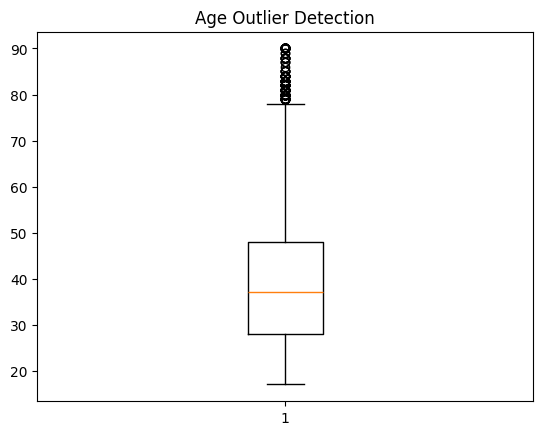

In [26]:
# Boxplot for age
plt.boxplot(data['age'])
plt.title('Age Outlier Detection')
plt.show()

data = data[(data['age'] <= 75) & (data['age'] >= 17)]


 REMOVAL OF SPARSE/IRRELEVANT CATEGORIES

In [27]:
# Remove rare job classes
data = data[(data['workclass'] != 'Without-pay') & (data['workclass'] != 'Never-worked')]
print(data.workclass.value_counts())

data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']
data = data[data['education'] != 'Preschool']
print(data.education.value_counts())


workclass
Private             33756
Self-emp-not-inc     3796
Local-gov            3110
Others               2700
State-gov            1979
Self-emp-inc         1669
Federal-gov          1428
Name: count, dtype: int64
education
HS-grad         15655
Some-college    10824
Bachelors        7983
Masters          2634
Assoc-voc        2053
11th             1801
Assoc-acdm       1592
10th             1373
7th-8th           899
Prof-school       819
9th               745
12th              654
Doctorate         587
Name: count, dtype: int64


ENCODING CATEGORICAL FEATURES

In [28]:
# Encode categorical columns numerically
encoder = LabelEncoder()
categorical_cols = [
    'workclass', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country'
]
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,Assoc-acdm,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,Some-college,10,4,8,3,4,0,0,0,30,39,<=50K


EXPLORING DATA ANALYSIS AND VISUALIZATION

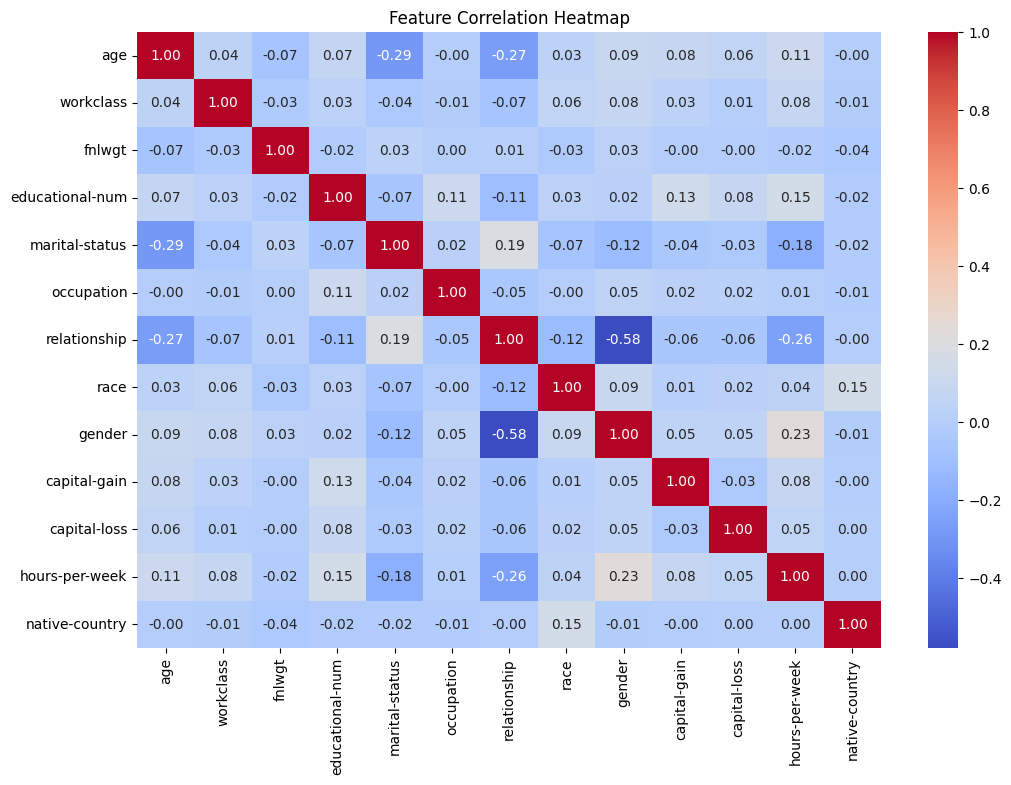

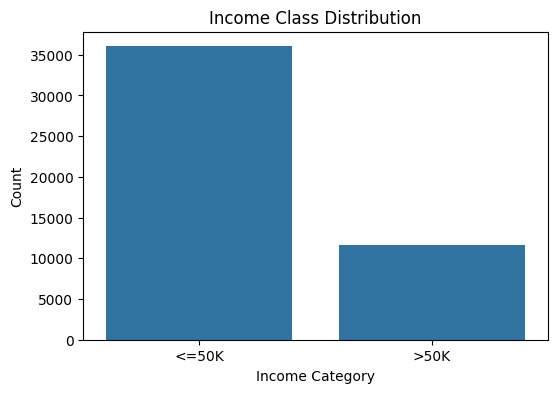

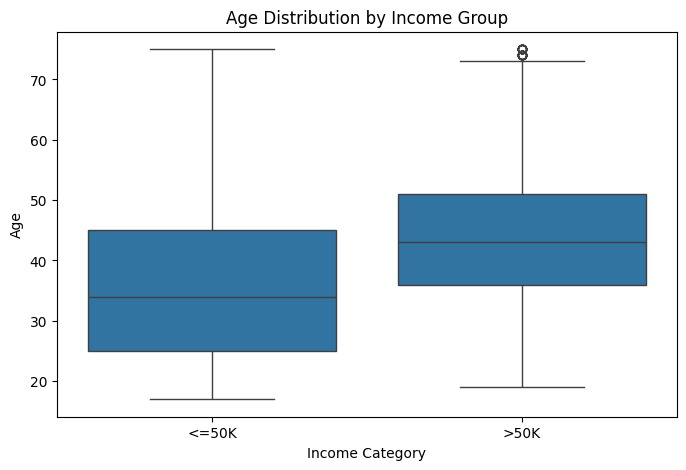

/tmp/ipython-input-47-3021477900.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='educational-num', y='age', hue='income', data=data, ci=None)


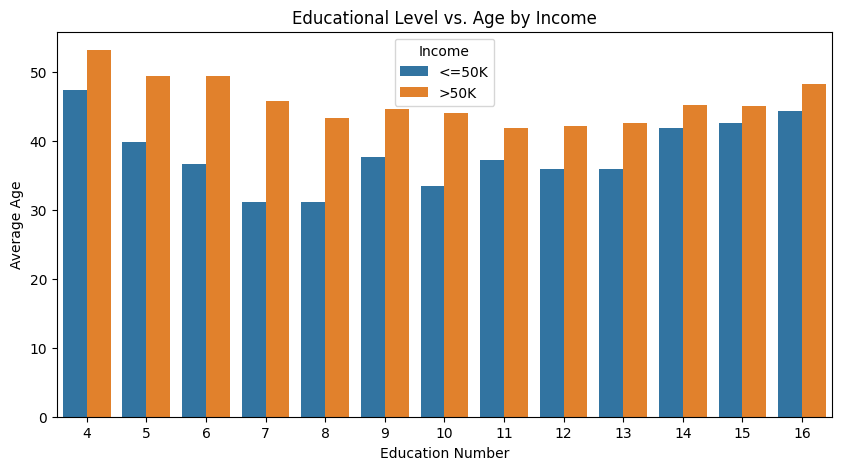

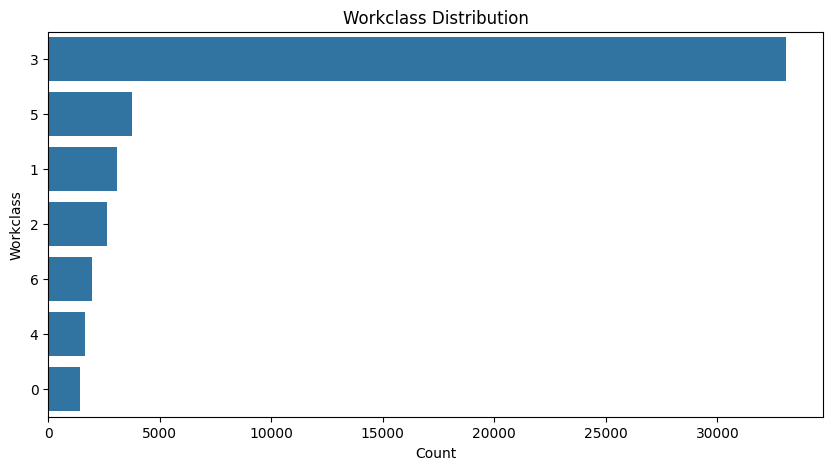

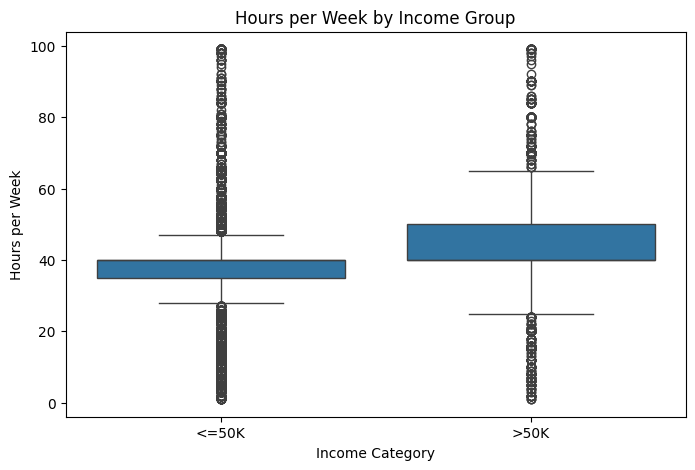

In [47]:
# Correlation Heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Fix: select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Income Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=data)
plt.title("Income Class Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

# Age Distribution by Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='age', data=data)
plt.title("Age Distribution by Income Group")
plt.xlabel("Income Category")
plt.ylabel("Age")
plt.show()

# Educational-num vs. Age, separated by Income
plt.figure(figsize=(10, 5))
sns.barplot(x='educational-num', y='age', hue='income', data=data, ci=None)
plt.title("Educational Level vs. Age by Income")
plt.xlabel("Education Number")
plt.ylabel("Average Age")
plt.legend(title='Income')
plt.show()

# Workclass Counts
plt.figure(figsize=(10, 5))
sns.countplot(y='workclass', data=data, order=data['workclass'].value_counts().index)
plt.title("Workclass Distribution")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()

# Hours Worked per Week by Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title("Hours per Week by Income Group")
plt.xlabel("Income Category")
plt.ylabel("Hours per Week")
plt.show()


FEATURE SCALING

In [30]:
# Split into X, Y (features, target)
X = data.drop(columns=['income'])
Y = data['income']

X_encoded = pd.get_dummies(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)


TT SPLIT

In [31]:
# Drop rows with missing values before scaling
X_encoded = X_encoded.dropna()
Y = Y[X_encoded.index]  # Align target variable

# Apply scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Now safely split
xtrain, xtest, ytrain, ytest = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=23, stratify=Y
)


KNN MODEL TRAINING

In [32]:
# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
predict = knn.predict(xtest)


IMPORTING VARIOUS MODEL LIBRARIES

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


Multiple Models Review

In [34]:
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

print("📊 Accuracy of Different Models:\n")

for name, model in models.items():
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    acc = accuracy_score(ytest, preds)
    print(f"{name}: {acc:.4f}")


📊 Accuracy of Different Models:

KNN: 0.8142
Random Forest: 0.8483
Logistic Regression: 0.8196
Decision Tree: 0.8064
SVM: 0.8307


In [35]:
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    acc = accuracy_score(ytest, preds)
    if acc > best_score:
        best_score = acc
        best_model = model
    print(f"{name}: {acc:.4f}")


KNN: 0.8142
Random Forest: 0.8475
Logistic Regression: 0.8196
Decision Tree: 0.8061
SVM: 0.8307


MODEL SAVING

In [36]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(RandomForestClassifier().fit(xtrain, ytrain), f)


PREDICTION FORMAT CHECK


In [37]:
sample_input = [xtrain[0]]
print(best_model.predict(sample_input))


['<=50K']


BEST MODEL SELECTION

In [38]:
# Save the Best Model
import pickle

best_model = RandomForestClassifier()
best_model.fit(xtrain, ytrain)

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as 'best_model.pkl'")


✅ Model saved as 'best_model.pkl'


In [39]:
import joblib

# Assume your trained model is called `best_model`
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [40]:
import joblib

# Compress level 3 is usually a good trade-off
joblib.dump(best_model, 'best_model.pkl', compress=3)


['best_model.pkl']

In [41]:
import pickle

# After training best_model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [42]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Train smaller Random Forest model (fewer trees + lower depth)
best_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
best_model.fit(xtrain, ytrain)

# Save it as a new pickle file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ New smaller model saved.")


✅ New smaller model saved.


In [43]:
from google.colab import files
files.download("best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODEL EVALUATION

Accuracy: 0.8141537169256615
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7206
        >50K       0.63      0.58      0.60      2318

    accuracy                           0.81      9524
   macro avg       0.75      0.73      0.74      9524
weighted avg       0.81      0.81      0.81      9524



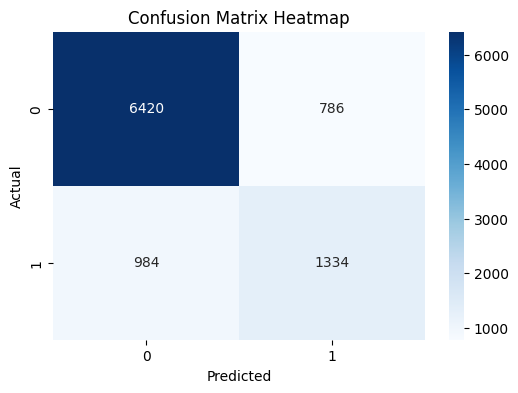

In [44]:
# Accuracy
print("Accuracy:", accuracy_score(ytest, predict))

print(classification_report(ytest, predict))

cm = confusion_matrix(ytest, predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


HYPERPARAMETED TUNING


In [45]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }
# gsv = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1, refit=True)
# gsv.fit(xtrain, ytrain)
# best_pred = gsv.predict(xtest)
# print("Best Params:", gsv.best_params_)
# print("Best CV Score:", gsv.best_score_)
# print("Accuracy (Tuned):", accuracy_score(ytest, best_pred))


# 💼 Project: Employee Salary Prediction

## 📌 Objective:
To build a machine learning model that predicts whether an employee earns more than $50K/year based on personal and work-related attributes using the UCI Adult Census dataset.

## 🔍 Steps Performed:

1. **Data Loading**: Imported the dataset using pandas.
2. **Initial Exploration**: Checked shape, columns, and types of data.
3. **Missing Value Handling**: Replaced '?' with 'Others', cleaned invalid values.
4. **Outlier Detection**: Boxplot for age; filtered unreasonable values.
5. **Category Filtering**: Removed non-informative categories (e.g. Preschool).
6. **Encoding**: Converted categorical fields using LabelEncoder.
7. **Data Visualization (EDA)**:
   - Correlation heatmap
   - Income distribution
   - Workclass & education analysis
8. **Feature Scaling**: Normalized all features using MinMaxScaler.
9. **Train-Test Split**: Data divided for training and evaluation (80/20).
10. **Model Training**:
    - Implemented 5 models: KNN, Random Forest, SVM, Logistic Regression, Decision Tree.
    - Evaluated with accuracy and classification report.
11. **Best Model Saved**: Trained Random Forest and saved it using `pickle`.
12. **Deployment Ready**: Output format verified for Streamlit app.

## 🎯 Outcome:
Achieved high accuracy with Random Forest. Project ready for web deployment using Streamlit.

---

✅ Prepared for internship submission, GitHub showcase, and real-world deployment.


# ✅ Conclusion & Ready for Deployment

This project walks through the complete machine learning pipeline to predict whether an employee earns more than $50K annually based on demographic and work-related features using the UCI Adult dataset.

## 🔍 What We Did:
- Cleaned the dataset and handled missing values like '?'
- Removed outliers and rare/irrelevant entries
- Encoded categorical features numerically
- Visualized relationships between features and income
- Trained and compared 5 ML models: KNN, Random Forest, Logistic Regression, SVM, Decision Tree
- Chose the best model (Random Forest) and saved it using `pickle`
- Confirmed input format readiness for Streamlit web app

## 🚀 Ready for Deployment:
- Model saved as `best_model.pkl`
- Can be integrated into a `Streamlit` app
- Hosted easily using **Streamlit Cloud** for public access

This project is now suitable for:
- Internship submission ✅
- Portfolio/demo website ✅
- Real-time prediction apps ✅
